# Graph theory - BBGAgora
On this notebook we will be able to get a first touch with [NetworkX](https://networkx.org/) (Python package for graphs) and [Neo4j](https://neo4j.com/)
(a graph database). Also, we will see some graphs concepts that can be useful in case on some data analysis. 

We will use *OV.txt* file, somantic mutation data file, extracted and modified from [pyNBS: a Python implementation for network-based stratification of tumor mutations](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6084608/) paper. 

Described as follows:

__Sample__ | __Gene__

TCGA-04-1331 | ABHD13

TCGA-04-1331 | ACTRT1

TCGA-04-1331 | AHNAK2

....
__________

## NetworkX

In [3]:
# Installs & imports
!git clone https://github.com/dmartmillan/graph-theory-bbgagora.git
!pip install networkx
import csv
import networkx as nx
import matplotlib.pyplot as plt

Cloning into 'graph-theory-bbgagora'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 2), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), 487.41 KiB | 1.42 MiB/s, done.


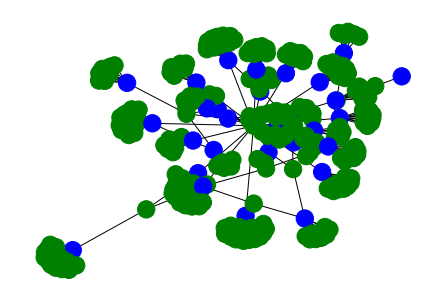

In [11]:
color_map = []
G = nx.Graph()
with open('OV.txt', 'r') as file:
    reader = csv.reader(file, delimiter = '\t')
    for i, row in enumerate(reader):
        if row[0] not in G:
            color_map.append("blue")
        G.add_node(row[0], type="sample")
        if row[1] not in G:
            color_map.append("green")
        G.add_node(row[1], type="gene")
        G.add_edge(row[0], row[1])

nx.draw(G, node_color=color_map)

In [12]:
print(f"Number of nodes: {G.number_of_nodes()} - Sample and Genes")
print(f"Number of edges: {G.number_of_edges()} - Iteraction between Sample - Gene")

Number of nodes: 287
Number of edges: 294


### Degree
Number of edges that incident of the vertex. 

With that we can calculate: Which gene has the most interaction with samples? 

In [17]:
print("Counting the degree of each gene.")
attributes = nx.get_node_attributes(G, "type")
degrees_by_gene = [(n, G.degree(n)) for n in G.nodes() if attributes[n] == "gene"]
result = sorted(degrees_by_gene, key=lambda x: -x[1])

print(f"The genes that are more linked with the samples are (from a list of {len(result)} genes):")
for i in range(5):
    print(f"Gene: {result[i][0]}, Interactions: {result[i][1]}")

Counting the degree of each gene.
The genes that appears most in the samples are (from a list of 258 genes):
Gene: TP53, Interactions: 21
Gene: TTN, Interactions: 4
Gene: ACACB, Interactions: 3
Gene: ZFHX4, Interactions: 3
Gene: ANKRD30A, Interactions: 3


### Some other fucntions

__Radius__: the minimum among all the maximus distances between a vertex to all other vertices. 

__Diameter__: the maximum distance between the pair of vertices.

__Center__: consists of all the vertices whose eccentricity is minimum.

__Density__: how many relationships that exists between nodes compared to how many relationships are possible.

In [48]:
print(f"Radius: {nx.radius(G)}")
print(f"Diameter: {nx.diameter(G)}")
print(f"Center: {nx.center(G)}")
print(f"Density: {nx.density(G)}")

Radius: 4
Diameter: 8
Center: ['TP53']
Density: 0.007163568139177895


### Clustering coefficient

Study the probability that two neighboors of one node, also can be linked, 

![Clustering coefficient](./clustering_coefficient.png)

If the neighborhood is fully connected, the clustering coefficient is 1 and a value close to 0 means that there are hardly any connections in the neighborhood.

In [26]:
print(nx.average_clustering(G))

0.0


_________________

## Neo4j

Also can be use Neo4j browser in this website https://9be4e5bb69415782b3de951eaf7f8f30.neo4jsandbox.com/

Username: neo4j

Password: bbglab

In [28]:
!pip install neo4j-driver
from neo4j import GraphDatabase, basic_auth

     |████████████████████████████████| 76 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 503 kB 7.5 MB/s eta 0:00:01
  Created wheel for neo4j-driver: filename=neo4j_driver-4.3.7-py3-none-any.whl size=100724 sha256=faa8d9e2eee3da1f023e69d9f20c249ce4ca1f3ac65f4724bc03aee94f5d84f1
  Stored in directory: /home/dmartinez/.cache/pip/wheels/cf/6f/d1/eb82555462425c9dee0489b665a2b712ddda8ab1c33d2ce145
Successfully built neo4j-driver


In [47]:
driver = GraphDatabase.driver(
  "bolt://3.237.67.250:7687",
  auth=basic_auth("neo4j", "bbglab"))

with driver.session() as session:
    result = session.run("MATCH (a:SAMPLE) RETURN COUNT(a)")
    for r in result:
        print(r)

<Record COUNT(a)=29>


In [ ]:
driver.close()